In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import metrics

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
incd=pd.read_csv("insurance.csv")
incd

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [10]:
incd.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [11]:
incd.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [12]:
incd.shape

(1338, 7)

In [14]:
incd.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [15]:
incd.notnull().sum()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
expenses    1338
dtype: int64

In [17]:
incd.describe()

,age,bmi,children,expenses
count,True,True,True,True
mean,False,False,False,True
std,False,False,False,True
min,False,False,False,True
25%,False,False,False,True
50%,False,False,False,True
75%,False,False,False,True
max,False,False,False,True


<ipython-input-18-ab41e922317b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(incd['age'])


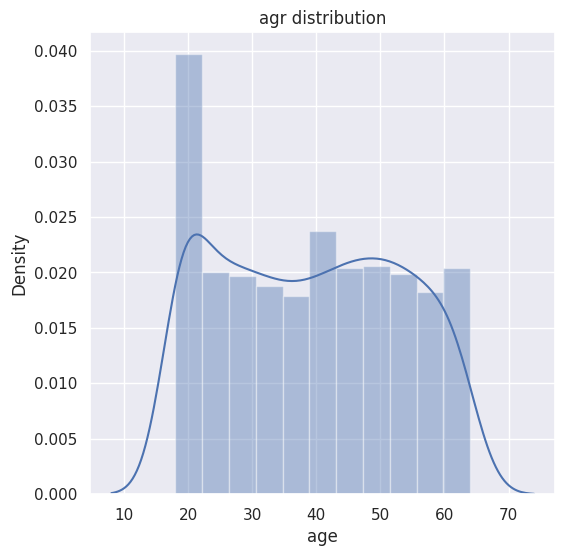

In [18]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(incd['age'])
plt.title("agr distribution")
plt.show()

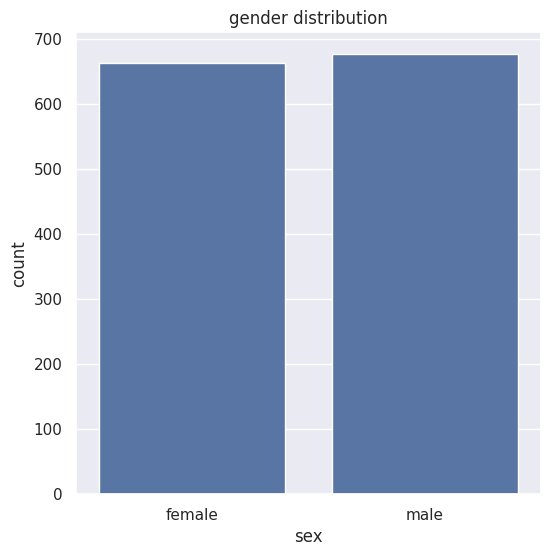

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x ='sex' , data = incd)
plt.title("gender distribution")
plt.show()

<ipython-input-24-9adbcb630d6e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(incd['bmi'])


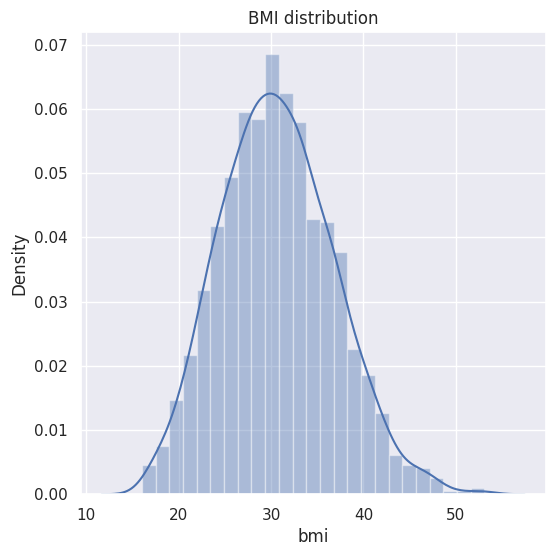

In [24]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(incd['bmi'])
plt.title("BMI distribution")
plt.show()

In [26]:
pd.unique(incd['children'])

array([0, 1, 3, 2, 5, 4])

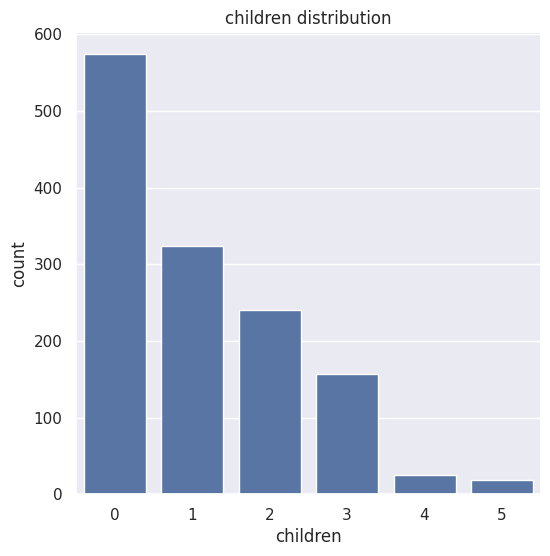

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x ='children' , data = incd)
plt.title("children distribution")
plt.show()

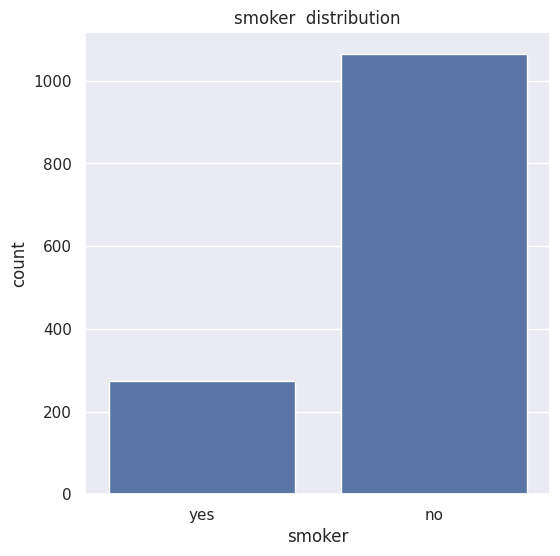

In [28]:
plt.figure(figsize=(6,6))
sns.countplot(x ='smoker' , data = incd)
plt.title("smoker  distribution")
plt.show()

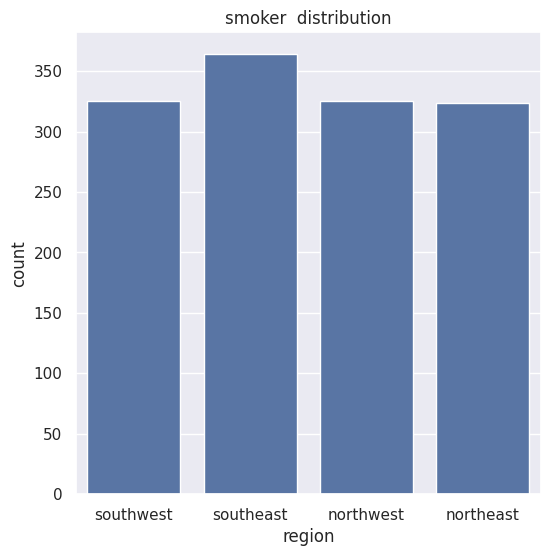

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(x ='region' , data = incd)
plt.title("smoker  distribution")
plt.show()

<ipython-input-31-2bca0ce7d9ca>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(incd['expenses'])


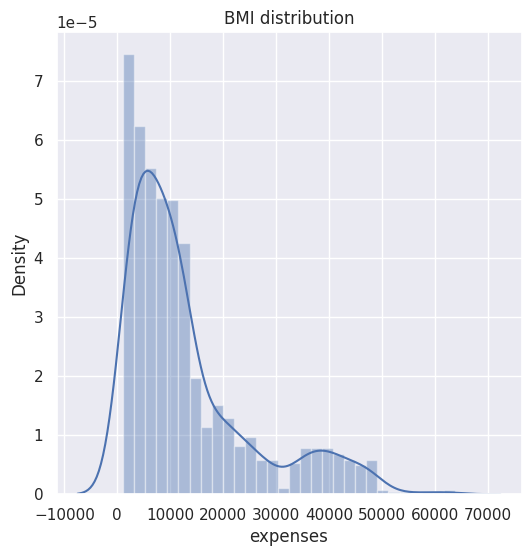

In [31]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(incd['expenses'])
plt.title("BMI distribution")
plt.show()

In [32]:
incd

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [35]:
pd.unique(incd['sex'])
incd.replace({'sex':{'male':0,'female':1}},inplace=True)
incd.replace({'smoker':{'yes':0,'no':1}},inplace=True)
incd.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [36]:
incd

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,0,1,16884.92
1,18,0,33.8,1,1,0,1725.55
2,28,0,33.0,3,1,0,4449.46
3,33,0,22.7,0,1,3,21984.47
4,32,0,28.9,0,1,3,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,1,3,10600.55
1334,18,1,31.9,0,1,2,2205.98
1335,18,1,36.9,0,1,0,1629.83
1336,21,1,25.8,0,1,1,2007.95


In [38]:
x=incd.drop(columns='expenses',axis=1)
y=incd['expenses']

In [39]:
print(x)
print(y)

      age  sex   bmi  children  smoker  region
0      19    1  27.9         0       0       1
1      18    0  33.8         1       1       0
2      28    0  33.0         3       1       0
3      33    0  22.7         0       1       3
4      32    0  28.9         0       1       3
...   ...  ...   ...       ...     ...     ...
1333   50    0  31.0         3       1       3
1334   18    1  31.9         0       1       2
1335   18    1  36.9         0       1       0
1336   21    1  25.8         0       1       1
1337   61    1  29.1         0       0       3

[1338 rows x 6 columns]
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64


In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x.shape,x_train.shape,y_test.shape)

(1338, 6) (1070, 6) (268,)


In [41]:
model=LinearRegression()

In [42]:
model.fit(x_train,y_train)

LinearRegression()

In [43]:
tdp=model.predict(x_train)
tda=metrics.r2_score(y_train,tdp)
tda

0.7515233180624387

In [44]:
tdp=model.predict(x_test)
tda=metrics.r2_score(y_test,tdp)
tda

0.7447382074449773

In [48]:
id=(32,0,28.88,0,1,3)
id2=np.array(id)
id3=id2.reshape(1,-1)

In [50]:
prediction=model.predict(id3)
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5659.95798486])